In [ ]:
shape = (4, 28, 28, 3)
x = tf.random.normal(shape)
y = tf.keras.layers.Conv2D(2, 3, activation='relu', input_shape=shape[1:])(x)
print(y.shape)

(4, 26, 26, 2)


In [ ]:
x = tf.constant([[1,2,3],[4,5,6],[7,8,9]])
x = tf.reshape(x,[1,3,3,1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (1,1),
                                           padding = 'valid')
print(max_pool_2d(x))

tf.Tensor(
[[[[5]
   [6]]

  [[8]
   [9]]]], shape=(1, 2, 2, 1), dtype=int32)


# 예제 : MNIST 필기체 숫자 인식

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화한다. 
train_images, test_images = train_images / 255.0, test_images / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer="adam",
		loss="sparse_categorical_crossentropy",
		metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 3ms/step - loss: 0.1397 - accuracy: 0.9571
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0461 - accuracy: 0.9852
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0327 - accuracy: 0.9894
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0255 - accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0190 - accuracy: 0.9936


# 연습문제 11번

패션 MNIST 데이터 셋을 사용하여 (10개의 범주의 약 70,000개의 패션 관련 이미지를 이용해서)

해상도는 28*28이다. 동일한 작업을 컨벌루션 신경망을 이용해서 시도해 보자.

#### CNN을 사용했을 때 성능이 더 좋아짐.

4431872/4422102 [==============================] - 0s 0us/step


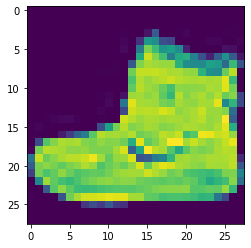

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

plt.imshow(train_images[0])

train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4873 - accuracy: 0.8214
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3169 - accuracy: 0.8851
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2728 - accuracy: 0.8993
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2458 - accuracy: 0.9096
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2600 - accuracy: 0.9075
정확도: 0.9075000286102295
